<a href="https://colab.research.google.com/github/natthaphon-wr/cpe393-codingAI/blob/main/Lab10_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab10 Introduction to Reinforcement Learning

- Natthaphon Rotechanathamcharoen 62070501019

## Lab Instruction

This lab, we will implement an Q-learning agent that will solve the GridWorld problem. The objective of your agent is to maximize the reward by find the shortest path to the exit without stepping on a bomb or a cliff. The result will be compare with the randomly move agent.

###The total lab score is 10 which will be evaluated as follows:

- Creative  (Do as the instruction said. This include the model tuning section where you have to do a proper amount of tuning) - 4 points
- Design of logic (No weired things in the process) - 2 points
- Journaling (Communicate your thought process and discuss result & analyse in every step) - 4 points

### Reinforcement Learning

The reinforcement learning components:</br>
<img src='https://github.com/fongfongfong/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/rl.png?raw=1' width=500>

- Reinforcement Learning Blog Post (Thai): <a href="https://medium.com/asquarelab/ep-1-reinforcement-learning-%E0%B9%80%E0%B8%9A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%95%E0%B9%89%E0%B8%99-acfa9d42394c"> Thammasorn, A-Square</a></br>
- Reinforcement Learning Blog Post (Eng): <a href="http://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/"> Adventures in Machine Learning</a>

### Temporal-Different Learning
**Temporal-difference (TD) learning** is a combination of **Monte Carlo** ideas and **dynamic programming (DP)** ideas.</br>
Like Monte Carlo methods, TD methods **can learn directly from raw experience without a model of the environment’s dynamics**.</br> 
Like DP, TD methods update estimates based in part on other learned estimates, **without waiting for a final outcome** (they bootstrap).</br>
The relationship between TD, DP, and Monte Carlo methods is a recurring theme in the theory of reinforcement learning

In [ ]:
# Setup 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import env

### Environment - Cliff Gridworld

The environment is a Cliff Gridworld, illustrated as follows: </br>

<img src='https://github.com/fongfongfong/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/grid.png?raw=1' width=500></br>

The world is a 10x10 grid where the exit is at bottom right corner. The bomb is randomly generated around the exit.</br>
The agent is randomly start around the top left corner section. </br>
Each step count as -1. In other word, the more step your agent take, the more penalty you have.</br>
If your agent move against the corner, your agent will move. If your agent step to the cliff, the penalty is -20, same as stepping into a bomb which get -10 penalty.</br>
If your agent reach to the exit, you will recieve 20 reward.</br>

The episode is end when your agent found a way out and get a reward or step on a bomb and get the penalty point.</br>
Your agent is at the starting point when the new episode begin.

```env.World```</br>
>**Properties**
- height: The height of a grid world
- width: The width of a grid world
- current_location: current location of your agent.
- actions: a list of an available actions (up,down,left,right)</br>

>**Methods**
- ```available_actions()``` Get a set of available actions
- ```move_agent(action)``` Move an agent to the given direction and return a reward of that action.
- ```reset()``` Reset the state of the environment to the starting point.
- ```end_state()``` Get the end state. Return True if the state is end. False, otherwise.
- ```render()``` Show the current terran of the grid world

In [ ]:
# Initialize environment
env = env.World()

In [ ]:
env.grid

array([[ -1.,  -1.,  -1.,  -1., -20., -20., -20., -20., -20.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20., -20., -20., -20., -20.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20., -10.,  -1., -10.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20.,  -1.,  -1.,  -1.,  -1.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20.,  -1.,  -1.,  -1., -20.,  -1.],
       [ -1.,  -1.,  -1.,  -1., -20.,  -1.,  -1.,  -1.,  -1.,  20.]])

In [ ]:
env.render()

array([[  0.,   0.,   0.,   0., -20., -20., -20., -20., -20.,   0.],
       [  0.,   0.,   1.,   0., -20., -20., -20., -20., -20.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -20.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -20., -10.,   0., -10.,   0.,   0.],
       [  0.,   0.,   0.,   0., -20.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -20.,   0.,   0.,   0., -20.,   0.],
       [  0.,   0.,   0.,   0., -20.,   0.,   0.,   0.,   0.,  10.]])

In [ ]:
env.current_location

(1, 2)

In [ ]:
env.available_actions()

['up', 'down', 'left', 'right']

### Define Random Agent

Define an agent that walk randomly.

Hint : use 
` np.random.choice` to random available action

In [ ]:
# Define Random Agent Object
class DumbAgent():
    def action(self, available_actions):
        #
        # Code Here
        return np.random.choice(available_actions)

In [ ]:
# Test your code
agent = DumbAgent()
agent.action([1,2,3,4])

3

###  Define a Q-Agent

Define an agent that used q-learning using the following pseudocode: </br>
<img src='https://github.com/fongfongfong/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/q_learning.png?raw=1'>

- S is a state of the environment
- S' is a next state
- A is a action choosen by the agent
- A' is a next action
- epsilon, alpha, gamma are the parameter for the agent

In [ ]:
class Q_Agent():
    
    def __init__(self, environment, alpha, gamma, epsilon):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x,y)] = {'up':0,'down':0,'left':0,'right':0}
                
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        
    def action(self, available_actions):
        if np.random.uniform(0,1) < self.epsilon:
            # Exploration
            return np.random.choice(available_actions)
        else:
            # Exploitation
            S = self.q_table[self.environment.current_location]
            max_value = max(S.values())
            # random if you have multiple max value
            return np.random.choice([key for key, value in S.items() if value == max_value])
            
            
    def update(self, current_state, reward, next_state, actions):
        S_prime = self.q_table[next_state]
        max_value_S_prime = max(S_prime.values())
        current_Q_value = self.q_table[current_state][actions]
        
        # From the equation in pseudocode
        self.q_table[current_state][actions] = current_Q_value + self.alpha * (reward + self.gamma*max_value_S_prime - current_Q_value)

###  Deploy Your Agent

Create a function to run your agent in an environment. Your agent will run n trails, each trails has a maximum of m max_steps_per_episode.</br>

The function must record the total reward in each trials and return when the function end.
```python
total_reward = run(env, agent, trials, max_steps_per_episode, learn=False)
```

For the Q-agent, you have to update Q-value for your agent using following code: </br>
```python
if learn: 
    agent.update( ... )
```

In [ ]:
def run(env, agent, trials, max_steps_per_episode, learn=False):
    #
    # Code here
    # Sent the action to environment and get the next state 
    # and reward
    # Hint: 
    #     Define total_reward, sum_reward, step, 
    #            current_state, action, reward & next_state 
    
    # Initialize total reward in each episode
    total_reward = []

    # For each episode
    for ep in range(trials):
      sum_reward = 0
      env.reset() # Reset the environment

      # For each step
      for step in range(max_steps_per_episode):

        current_state = env.current_location            # Get the current state
        action = agent.action(env.available_actions())  # Choose action
        reward = env.move_agent(action)                 # Get reward from current state/action and update state
        next_state = env.current_location               # Next state
        sum_reward += reward                            # Sum reward in each step

        # For Q_Agent that learn
        if learn:
          agent.update(current_state, reward, next_state, action) # Update Q-Table
      
        # Check state that in terminal states? (exit and bomb)
        if env.end_state():
          break

      # Include sum reward in each ep to total reward
      total_reward.append(sum_reward)

    return total_reward

In [ ]:
# Plot reward
def plot_total_reward(total_reward):
    plt.plot(total_reward)
    plt.title('The Sum of Reward During Each Episode')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')

### Run a Dump Agent

In [ ]:
## Run
env.reset()
agent_d =  DumbAgent()
total_reward = run(env, agent_d, trials=100, max_steps_per_episode=200, learn=False)

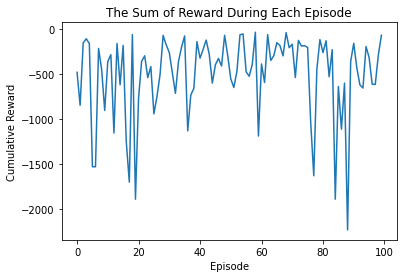

In [ ]:
## Plot reward
plot_total_reward(total_reward)

### Run an Q-Agent

In [ ]:
## Run
env.reset()
agent_q = Q_Agent(env, alpha=0.01, gamma=1, epsilon=0.05)
total_reward = run(env, agent_q, trials=100, max_steps_per_episode=200, learn=True)

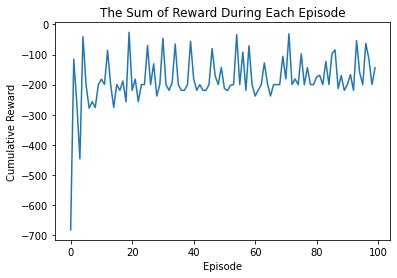

In [ ]:
## Plot reward
plot_total_reward(total_reward)

### Show Q-Table

Show the agent's Q-table using to make a decision.

In [ ]:
def Viz_q_table(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            Viz_q_table(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [ ]:
Viz_q_table(agent_q.q_table)

(0, 0)
	up
		-0.9599369048318745
	down
		-0.9677508506131508
	left
		-0.9597079372647184
	right
		-0.9658833949675467
(0, 1)
	up
		-0.9698987097857922
	down
		-0.9660015004373975
	left
		-0.9741958492850418
	right
		-0.9710355134858865
(0, 2)
	up
		-0.9499000574600798
	down
		-0.9589574962561692
	left
		-0.954595780964898
	right
		-0.9565197917166388
(0, 3)
	up
		-0.9299839406878054
	down
		-0.9248598115559797
	left
		-0.9330621213483238
	right
		-1.7340574174647843
(0, 4)
	up
		-0.2
	down
		-0.2
	left
		-0.126220797526772
	right
		-0.2
(0, 5)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.2
(0, 6)
	up
		0
	down
		-0.2
	left
		-0.2
	right
		-0.2
(0, 7)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		0
(0, 8)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		-0.020699000000000002
(0, 9)
	up
		-0.2700000000000001
	down
		-0.27241269707723087
	left
		-0.59412
	right
		-0.26980100000000007
(1, 0)
	up
		-0.9587141393553571
	down
		-0.9607268402402322
	left
		-0.9597680801105901
	right
		-0.9612

###Experiment change paremeter

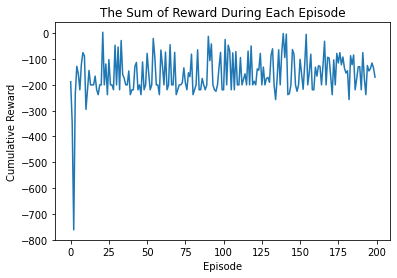

In [ ]:
# INCREASE Trials to see different
env.reset()
agent_q1 = Q_Agent(env, alpha=0.01, gamma=1, epsilon=0.05)
total_reward = run(env, agent_q1, trials=200, max_steps_per_episode=200, learn=True)

## Plot reward
plot_total_reward(total_reward)

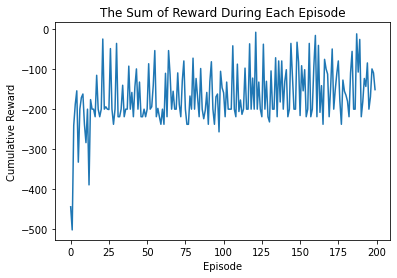

In [ ]:
# REDUCE GAMMA (reduce discount factor)
env.reset()
agent_q2 = Q_Agent(env, alpha=0.01, gamma=0.88, epsilon=0.05)
total_reward = run(env, agent_q2, trials=200, max_steps_per_episode=200, learn=True)

## Plot reward
plot_total_reward(total_reward)

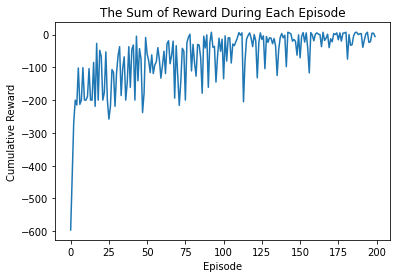

In [ ]:
# INCREASE APLHA (increase learning rate)
env.reset()
agent_q3 = Q_Agent(env, alpha=0.1, gamma=0.88, epsilon=0.05)
total_reward = run(env, agent_q3, trials=200, max_steps_per_episode=200, learn=True)

## Plot reward
plot_total_reward(total_reward)

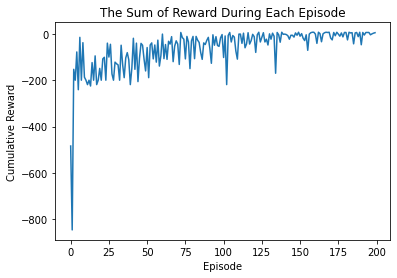

In [ ]:
# REDUCE EPSILON (reduce exploration)
env.reset()
agent_q4 = Q_Agent(env, alpha=0.1, gamma=0.88, epsilon=0.01)
total_reward = run(env, agent_q4, trials=200, max_steps_per_episode=200, learn=True)

## Plot reward
plot_total_reward(total_reward)

### Results and Discussion

Compare the result from a dump agent, as a based line, and the q-agent with different parameters.

For dump agent that has random action. There is reasonable that the agent doesn't learn and improve. 

For Q-agent that used Q-learning, The agent learn and improve in each episode. 

For changing parameter of Q-learning, I use 200 trials and create agent_q1 to compare with others. In each parameter, the results and discussion have following this

1. Discount Factor (gamma) :  When reduce discount factor (less than 1), it's mean that agent will less consider expected future reward at new state, and achieve more long term goal. However, there is not significant different graph between agent_q1 and agent_q2
2. Learning Rate (aplha) : When increase learning rate, agent will learn more, considering new state more. Graph of agent_q3 shows the reasonable result.
3. Epsilon : When reduce epsilon, it's mean that agent will less explore and exploit more. It can refer that agent will learn more, and the graph of agent_q4 support this reason.

And for the rest parameters, that are no.of trials and no.of max_steps_per_episode, if they are increased, agent will learn more, but will not get the different characteristics of learning.
